In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
from sklearn.externals.six import StringIO

import sys
#!{sys.executable} -m pip install pydotplus
#!conda install --yes --prefix {sys.prefix} graphviz
import pydotplus 

import sklearn.metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  cross_val_score

from IPython.display import Image
from scipy.stats import randint

print(sys.executable)
print(sys.executable)

c:\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


c:\python\python37\python.exe
c:\python\python37\python.exe


In [2]:
#carrega a base iris do próprio sckit-learn
iris = load_iris()

# carregando todas as características em X e os rótulos (labels, targets) em y
X = iris.data
y = iris.target #Sepal Length, Sepal Width, Petal Length and Petal Width.

print("As características são: " , iris.feature_names)
labels = iris.feature_names

As características são:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
##########################
#Exercício 01
##########################

#plote o gráfico de dispersão. 
#Dica: analise o vetor de labels (y) e plote com cores 
#diferentes as características comprimento e largura da pétala 
#(armazenadas em X) de cada rótulo.

"""
for f1 in range(0, len(labels)-1):
    for f2 in range(f1+1, len(labels)):
        plt.figure()
        plt.scatter(X[:,f1], X[:,f2], c=y, cmap=plt.cm.Set1)
        plt.xlabel(labels[f1])
        plt.ylabel(labels[f2])
        plt.show()
"""

#analise visualmente como seriam as fronteiras de decisão, 
#considerando apenas cortes ortogonais.

plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap=plt.cm.Set1)
plt.plot(range(1,8),[0.5 0.5])
plt.xlabel(labels[2])
plt.ylabel(labels[3])
plt.show()

SyntaxError: invalid syntax (<ipython-input-27-fdd687bef932>, line 25)

In [23]:
#separando em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

# imprime as dimensões das bases
print("Dimensões das bases de treinamento e teste:")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Dimensões das bases de treinamento e teste:
(120, 4)
(30, 4)
(120,)
(30,)



Accuracy
 0.8666666666666667


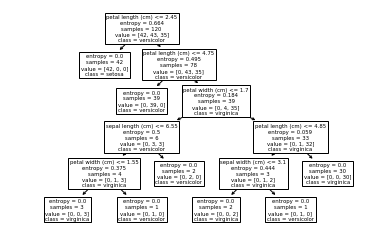

In [24]:
#classificação utilizando uma árvore de decisão não otimizada

#cria o classificador
clf = tree.DecisionTreeClassifier(criterion='gini') #testar com (criterion='entropy')

#treina o classificador com a base de treinamento
clf = clf.fit(X_train, y_train)

#testa o classificador com a base de testes
preditor = clf.predict(X_test)

##########################
#Exercício 02 - A
#mostrar a acurácia
##########################
acc = sklearn.metrics.accuracy_score(y_test, preditor)
print("\nAccuracy\n", acc)

##########################
#Exercício 02 - B
##Analise a árvore de decisão criada
##########################
#cria uma imagem para mostrar a árvore de decisão criada
#out = StringIO()
#tree.export_graphviz(clf, out_file=out, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
#graph=pydotplus.graph_from_dot_data(out.getvalue())
#Image(graph.create_png())
#with open('irisDT.png', 'wb') as f:
#    f.write(graph.create_png())
#Image("irisDT.png") 
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)


In [ ]:
##########################
#Exercício 02 - C
##Crie um classificador (ie, uma árvore de decisão) com os parâmetros 
##definidos manualmente por você

#procure informações na documentação.
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
##########################

In [ ]:
#classificação utilizando uma árvore de decisão otimizada, onde os parâmetros são definidos pela função RandomizedSearchCV

clf_rs = DecisionTreeClassifier()

##########################
#Exercício 03 - A
#Analisar os parâmetros utilizados pela RandomizedSearchCV()
##########################
param_dist = {"criterion": ["gini", "entropy"],
                  "min_samples_split": randint(5, 20),
                  "max_depth": randint(1, 20),
                  "min_samples_leaf": randint(1, 20),
                  "max_leaf_nodes": randint(2, 20)}
   
# roda a randomized search     
clf_rs = RandomizedSearchCV(clf_rs, 
                            param_distributions=param_dist,
                            n_iter=5)

##########################
#Exercício 03 - B
#Treinar e testar o classificador. Depois, mostrar as métricas de avaliação 
#(mesmos passos realizados para a árvore não otimizada)
##########################

#treina o classificador com a base de treinamento
clf_rs.fit(X_train, y_train)

#testa o classificador com a base de testes
preditor = clf_rs.predict(X_test)
        
#mostrar a acurácia
acc = sklearn.metrics.accuracy_score(y_test, preditor)
print("\nAccuracy\n", acc)

##########################
#Exercício 03 - C
#Analisar os parâmetros (e índices) testados na RandomizedSearchCV()
##########################
print("\nParâmetros e índices do melhor estimador encontrado:")
print(clf_rs.best_params_)
print(clf_rs.best_estimator_)

print("\nÍndices para todos os testes realizados pela RandomizedSearchCV():")
means = clf_rs.cv_results_['mean_test_score']
stds = clf_rs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_rs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

##########################
#Exercício 03 - D
##Compare a árvore de decisão com a anterior (não-otimizada)
##########################
out = StringIO()
tree.export_graphviz(clf_rs.best_estimator_, out_file=out, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
with open('irisDT-RS.png', 'wb') as f:
    f.write(graph.create_png())    
Image("irisDT-RS.png") 